In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
# 2. Đọc file csv và gắng index với giá Price
df = pd.read_csv('HPG Historical Data.csv')
df1=df.reset_index()['Price']
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
# 4. Chia train test
train_size = int(0.9 * len(df1))
test_size = int(0.1 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:]

# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# 8. Define LSTM Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)


c:\Users\hangt\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1636
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0026
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0013
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0010
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 9.3362e-04
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 8.8143e-04
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 8.0831e-04
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 7.5980e-04
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 7.5025e-04
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 7.2117e-04
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 6.2988e-04
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 6.9595e-04
Epoch 13/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 5.8020e-04
Epoch 14/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 6.5821e-04
Epoch 15/100
17/1

In [2]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1,1))

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import numpy as np


# Calculate MAE for testing data
test_mae = np.mean(abs(y_pred - ytest))
print('Testing MAE:', test_mae)

# Calculate RMSE for testing data
rmse_testing = np.sqrt(mean_squared_error(ytest, y_pred))
print(f'Testing RMSE: {rmse_testing}')

# Calculate MAPE for testing data
mape_testing = mean_absolute_percentage_error(ytest, y_pred) * 100
print(f'Testing MAPE: {mape_testing}')

# Calculate MLSE for testing data
mlse_testing = np.mean((np.log1p(ytest) - np.log1p(y_pred))**2)
print(f'Testing MLSE: {mlse_testing}')

# Calculate R-squared (R²) for testing data
r2_testing = r2_score(ytest, y_pred)
print(f'Testing R²: {r2_testing}')

# Calculate Mean Squared Error (MSE) for testing data
mse_testing = mean_squared_error(ytest, y_pred)
print(f'Testing MSE: {mse_testing}')

34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
Testing MAE: 191.24158896169354
Testing RMSE: 240.05259465261815
Testing MAPE: 1.6548381469045452
Testing MLSE: 0.0004256505043376937
Testing R²: 0.6365870191065974
Testing MSE: 57625.2481994542


# Dự đoán

In [3]:
# 13. Dự báo 90 ngày tiếp theo dựa trên dữ liệu test
x_input = test_data[60:].reshape(1, -1)

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output_90 = []
n_steps = x_input.shape[1]
i = 0
while i < 90:

    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output_90.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i = i + 1

[0.13130851]
73
1 day input [0.085273   0.08652834 0.085273   0.08402039 0.08464532 0.08151244
 0.09530479 0.10157603 0.10070716 0.106496   0.10553119 0.11035522
 0.1060136  0.1074608  0.1069784  0.1127645  0.11517652 0.11421171
 0.1132469  0.10794321 0.10842561 0.10939042 0.10939042 0.1060136
 0.11372931 0.11421171 0.11662373 0.12000055 0.11951814 0.12627179
 0.12482458 0.12096535 0.11614132 0.11855334 0.10456639 0.10408398
 0.10167197 0.09877755 0.10167197 0.10311918 0.1060136  0.10504879
 0.10504879 0.106496   0.10939042 0.11035522 0.10939042 0.106496
 0.106496   0.10504879 0.1074608  0.10987282 0.10890801 0.10167197
 0.09974235 0.10504879 0.10553119 0.10842561 0.10456639 0.10408398
 0.10456639 0.12675419 0.12819866 0.12337737 0.12289497 0.12434218
 0.12578939 0.1344699  0.13495231 0.13784673 0.1272366  0.13130851]
1 day output [[0.12727392]]
2 day input [0.08652834 0.085273   0.08402039 0.08464532 0.08151244 0.09530479
 0.10157603 0.10070716 0.106496   0.10553119 0.11035522 0.10601

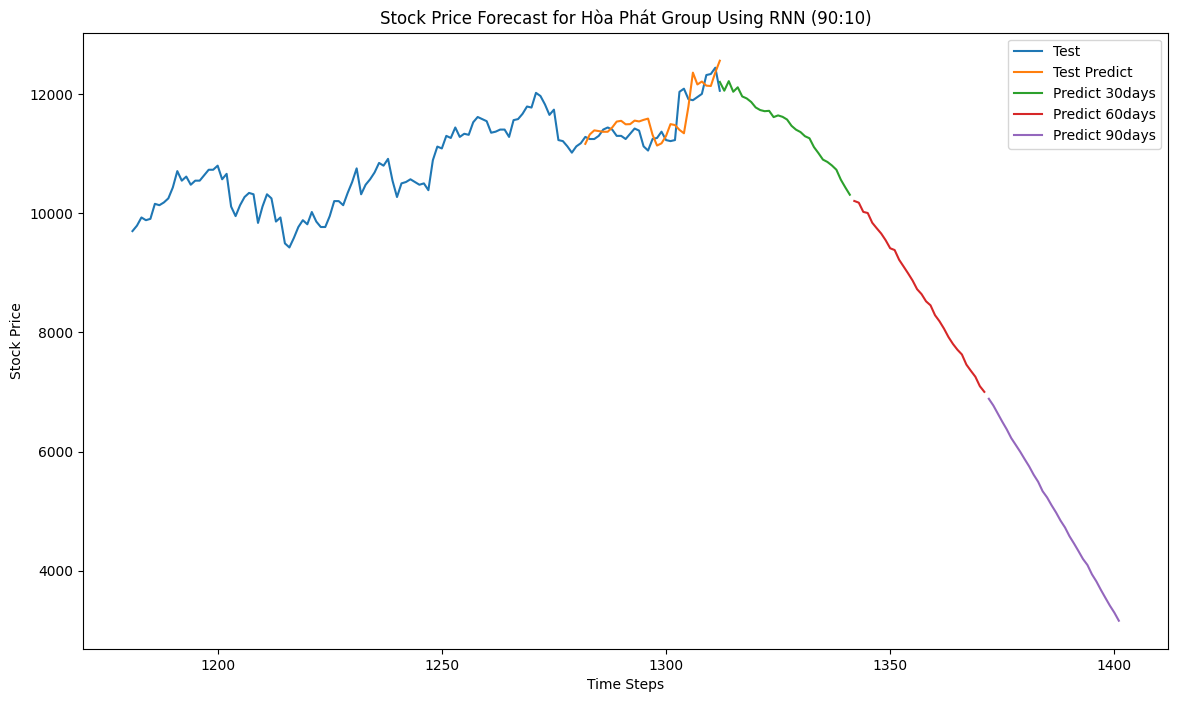

In [4]:
plt.figure(figsize=(14, 8))

# Vẽ dữ liệu kiểm tra (test_data)
test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(test_data), step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data), label='Test')

# Vẽ dữ liệu dự đoán cho tập kiểm tra (y_pred)
test_data_index = pd.RangeIndex(start=train_size + 101 , stop=train_size + len(test_data), step=1)
plt.plot(test_data_index,(y_pred))

# Vẽ dự đoán 30 ngày
predict_index_30 = pd.RangeIndex(start=len(df)-1, stop=len(df) + 29, step=1)
plt.plot(predict_index_30, scaler.inverse_transform(lst_output_90[:30]), label='Predict30days')

# Vẽ dự đoán 60 ngày
predict_index_60 = pd.RangeIndex(start=len(df)+29, stop=len(df) + 59, step=1)
plt.plot(predict_index_60, scaler.inverse_transform(lst_output_90[30:60]), label='Predict60days')

# Vẽ dự đoán 90 ngày
predict_index_90 = pd.RangeIndex(start=len(df)+59, stop=len(df) + 89, step=1)
plt.plot(predict_index_90, scaler.inverse_transform(lst_output_90[60:]), label='Predict90days')

# Thêm chú thích và hiển thị đồ thị
plt.title('Stock Price Forecast for Hòa Phát Group Using RNN (90:10)')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend(['Test', 'Test Predict', 'Predict 30days', 'Predict 60days', 'Predict 90days'])
plt.show()

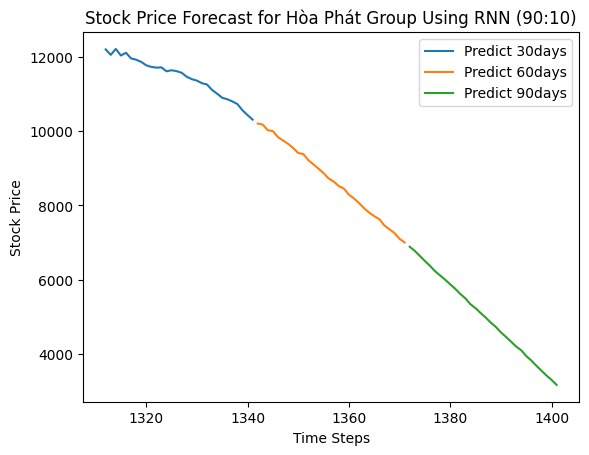

In [5]:
# Vẽ dự đoán 30 ngày
predict_index_30 = pd.RangeIndex(start=len(df)-1, stop=len(df) + 29, step=1)
plt.plot(predict_index_30, scaler.inverse_transform(lst_output_90[:30]), label='Predict30days')

# Vẽ dự đoán 60 ngày
predict_index_60 = pd.RangeIndex(start=len(df)+29, stop=len(df) + 59, step=1)
plt.plot(predict_index_60, scaler.inverse_transform(lst_output_90[30:60]), label='Predict60days')

# Vẽ dự đoán 90 ngày
predict_index_90 = pd.RangeIndex(start=len(df)+59, stop=len(df) + 89, step=1)
plt.plot(predict_index_90, scaler.inverse_transform(lst_output_90[60:]), label='Predict90days')

# Thêm chú thích và hiển thị đồ thị
plt.title('Stock Price Forecast for Hòa Phát Group Using RNN (90:10)')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend(['Predict 30days', 'Predict 60days', 'Predict 90days'])
plt.show()

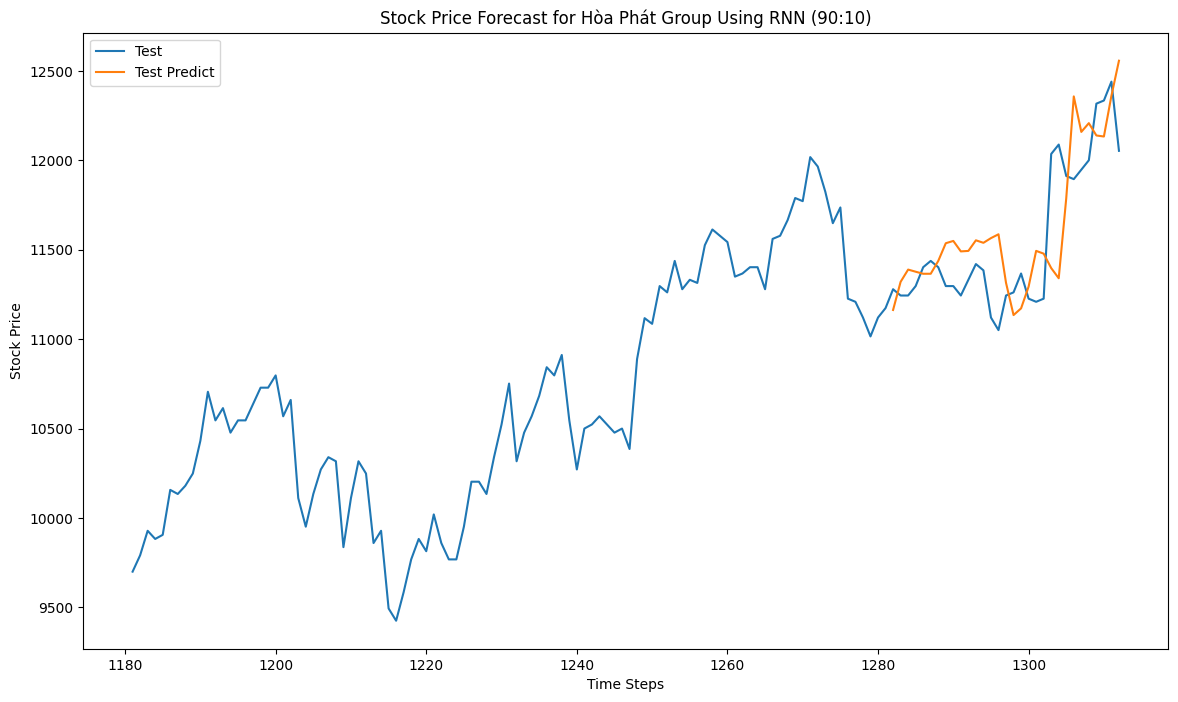

In [6]:
plt.figure(figsize=(14, 8))
# Vẽ dữ liệu kiểm tra (test_data)
test_data_index = pd.RangeIndex(start=train_size, stop=train_size + len(test_data), step=1)
plt.plot(test_data_index, scaler.inverse_transform(test_data), label='Test')

# Vẽ dữ liệu dự đoán cho tập kiểm tra (y_pred)
test_data_index = pd.RangeIndex(start=train_size + 101 , stop=train_size + len(test_data), step=1)
plt.plot(test_data_index,(y_pred))

# Thêm chú thích và hiển thị đồ thị
plt.title('Stock Price Forecast for Hòa Phát Group Using RNN (90:10)')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend(['Test', 'Test Predict'])
plt.show()